<a href="https://colab.research.google.com/github/nise1301/NBA_stats/blob/main/NBA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise NBA: A Altura Importa?

**Pergunta Central:** *A altura dos jogadores influencia seu sucesso na NBA?*

Nesta análise exploraremos como a altura se relaciona com:
- **Chance de ser draftado** (entrada na NBA)
- **Salário** (valor financeiro)
- **Performance** (eficiência vs volume)
- **Especialização por posição**

---

## 1. Configuração e Carregamento dos Dados

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Int_Ciencia_Dados/nba_stats.csv')

## 2. Exploração Inicial

In [33]:
df.head()

,year,name,playerId,playerSlug,positionId,teamId,status,gamesPlayed,avgMinutes,avgFouls,...,position,birthdate,college,draftinfo,birthplace,team,htwt,experience,rankingSalary,salary
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000"
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000"
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,"$11,250,000"
3,2002,Allen Iverson,366,allen-iverson,SG,PHI,inactive,60.0,43.700000,1.700000,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,14,"$12,375,000"
4,2003,Allen Iverson,366,allen-iverson,SG,PHI,inactive,82.0,42.500000,1.817073,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,11,"$13,500,000"


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              8162 non-null   int64  
 1   name                              8162 non-null   object 
 2   playerId                          8162 non-null   int64  
 3   playerSlug                        8162 non-null   object 
 4   positionId                        8156 non-null   object 
 5   teamId                            8162 non-null   object 
 6   status                            8162 non-null   object 
 7   gamesPlayed                       8162 non-null   float64
 8   avgMinutes                        8162 non-null   float64
 9   avgFouls                          8162 non-null   float64
 10  flagrantFouls                     8162 non-null   float64
 11  technicalFouls                    8162 non-null   float64
 12  ejecti

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.isnull().sum()

,0
year,0
name,0
playerId,0
playerSlug,0
positionId,6
teamId,0
status,0
gamesPlayed,0
avgMinutes,0
avgFouls,0


#### Sem duplicatas, mas com vários dados nan. Observamos que nem todos esses registros estão vazios por erro, mas estarem sem preenchimento é uma resposta (como ser draftado ou não), então precisamos ter cuidado e analisar os dados nan a cada visualização em vez de simplesmente dropa-los.

## 3. Preparação e Limpeza dos Dados

---
**Nota : O que é o Acessor `.str`?**

Nós fizemos uso de `.str` em linhas como `df['htwt'].str.split(...)`, um recurso especial do Pandas.

-   **O que é?** O `.str` é um "acessor" que nos permite aplicar funções de texto (string) a cada item de uma coluna do Pandas de uma só vez.

-   **Por que usar?** Em vez de escrever um loop `for` para percorrer cada linha e aplicar a função, o Pandas faz isso de forma otimizada e "vetorizada" (tudo de uma vez). Isso é muito mais rápido e o código fica mais limpo.

-   **Exemplo no nosso código:** A linha `df['htwt'].str.split(', ', expand=True)` está dizendo ao Pandas: "Pegue a coluna `htwt`, trate cada célula como um texto, e use a função `split()` para quebrar o texto onde houver uma vírgula seguida de espaço. O `expand=True` faz com que os resultados sejam colocados em novas colunas separadas".

É um atalho que economiza tempo e deixa nosso código de preparação de dados muito mais conciso.

In [62]:
# Preparar dados
# 1. Separar altura e peso
df[['altura_raw', 'peso_raw']] = df['htwt'].str.split(', ', expand=True)
print("DataFrame após separar altura e peso:")
display(df[['htwt', 'altura_raw', 'peso_raw']].tail())

# 2. Limpar e converter altura
# Separa pés e polegadas em colunas diferentes
altura_parts = df['altura_raw'].str.split("'", expand=True)

# Converte para número, tratando erros (valores não numéricos viram NaN)
pes = pd.to_numeric(altura_parts[0], errors='coerce')
polegadas = pd.to_numeric(altura_parts[1].str.replace('"', ''), errors='coerce')

# Calcula a altura final em pés decimais
df['altura_pes'] = round(pes + polegadas / 12, 2)

# 3. Limpar e converter salário
# Remove '$' e ',' e converte para número, tratando erros
df['salary_num'] = pd.to_numeric(df['salary'].str.replace('$', '').str.replace(',', ''), errors='coerce')


# Filtrar dados válidos (1 registro por jogador)
dados = df.dropna(subset=['altura_pes', 'salary_num']).drop_duplicates(subset=['name'], keep='last')

print(f"Dados preparados: {len(dados):,} jogadores únicos")
print(f"Altura média: {dados['altura_pes'].mean():.2f} pés")
print(f"Salário médio: ${dados['salary_num'].mean():.0f}")

DataFrame após separar altura e peso:


,htwt,altura_raw,peso_raw
8157,"6' 8"", 200 lbs","6' 8""",200 lbs
8158,"6' 8"", 205 lbs","6' 8""",205 lbs
8159,"6' 7"", 200 lbs","6' 7""",200 lbs
8160,"6' 3"", 180 lbs","6' 3""",180 lbs
8161,"6' 6"", 215 lbs","6' 6""",215 lbs


Dados preparados: 433 jogadores únicos
Altura média: 6.56 pés
Salário médio: $9664662


In [61]:
display(df[['altura_pes']].tail())

,altura_pes
8157,6.67
8158,6.67
8159,6.58
8160,6.25
8161,6.50


## 4. Mapa de Correlações

**Vamos começar com uma visão geral!** Este heatmap nos orienta sobre quais relações são mais fortes e merecem investigação detalhada.

---
**Nota : Como selecionamos Colunas com `.keys()`**

A linha `dados[list(variaveis_principais.keys())]` pode parecer complexa, mas é um atalho útil.

1.  `variaveis_principais.keys()`: Pega apenas os "nomes" (chaves) do nosso dicionário `variaveis_principais`. Ex: `['altura_pes', 'salary_num', ...]`.
2.  `list(...)`: Converte essas chaves em uma lista.
3.  `dados[...]`: Usa essa lista para selecionar apenas as colunas correspondentes do nosso DataFrame `dados`.

É uma forma organizada de escolher exatamente quais colunas queremos analisar no heatmap.

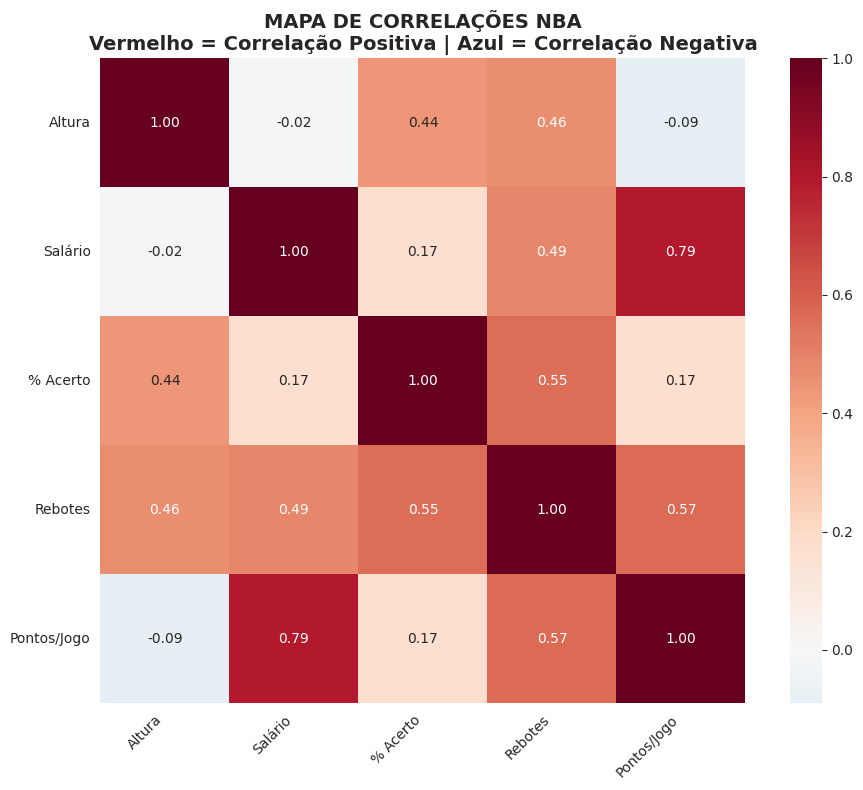

In [38]:
# Heatmap de correlações
variaveis_principais = {
    'altura_pes': 'Altura',
    'salary_num': 'Salário',
    'fieldGoalPct': '% Acerto',
    'avgRebounds': 'Rebotes',
    'avgPoints': 'Pontos/Jogo'
}

# Dados limpos para correlação
dados_correlacao = dados[list(variaveis_principais.keys())].dropna()
correlacoes = dados_correlacao.corr()

# Criar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes,
           annot=True,
           cmap='RdBu_r',
           center=0,
           fmt='.2f',
           square=True,
           xticklabels=list(variaveis_principais.values()),
           yticklabels=list(variaveis_principais.values()))

plt.title('MAPA DE CORRELAÇÕES NBA\nVermelho = Correlação Positiva | Azul = Correlação Negativa',
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Nota Estatística: Interpretando a Força da Correlação**

O número em cada célula do mapa (o coeficiente de correlação) nos diz a **força** e a **direção** da relação entre duas variáveis. O valor sempre varia de -1 a +1.

-   **O Sinal (Direção):**
    -   **`+` (Positivo):** As variáveis se movem na mesma direção (se uma sobe, a outra tende a subir).
    -   **`-` (Negativo):** As variáveis se movem em direções opostas (se uma sobe, a outra tende a descer).

-   **O Valor (Força):** Ignore o sinal por um momento e olhe o número.
    -   **0.0 a 0.3:** Correlação **Fraca ou Inexistente**. Ex: `0.17` ou `-0.08` indicam uma relação muito tênue ou nenhuma relação linear clara.
    -   **0.3 a 0.5:** Correlação **Fraca**.
    -   **0.5 a 0.7:** Correlação **Moderada**. Ex: `0.56` indica uma relação perceptível.
    -   **0.7 a 1.0:** Correlação **Forte**.

Portanto, um valor como **`0.56`** (Altura vs Rebotes) é uma correlação positiva moderada, enquanto **`0.17`** (Altura vs Salário) é uma correlação positiva fraca, quase desprezível.

#### Depois de tudo isso, parece haver uma relação mais forte da altura com os rebotes e porcentagem de acertos. Mas será que ela é um gargalo antes mesmo do jogador ser escalado?

## 5. Altura vs Draft: A Porta de Entrada

**Primeira pergunta:** *Ser alto facilita entrar na NBA?*

In [39]:
# Análise Draft vs Altura
dados['foi_draftado'] = dados['draftinfo'].notna()

# Estatísticas básicas
draftados = dados[dados['foi_draftado']]
nao_draftados = dados[dados['foi_draftado'] == False]

altura_draftados = draftados['altura_pes'].mean()
altura_nao_draftados = nao_draftados['altura_pes'].mean()
diferenca_draft = altura_draftados - altura_nao_draftados

---
**Nota List Comprehension e F-Strings**

Nesta célula, usamos dois conceitos úteis:

-   **List Comprehension**: A linha `faixas = [str(f) for f in draft_por_altura['faixa_altura']]` é um atalho do Python. É uma forma compacta de criar uma nova lista. Em vez de um loop `for` de várias linhas, fazemos tudo em uma só: "Para cada item `f` na coluna `faixa_altura`, converta-o para string `str(f)` e adicione à nova lista `faixas`".

-   **F-String Formatting**: A linha `f'{valor:.1f}%'` usa uma "f-string" para formatar o texto que aparece no gráfico. O `f` no início nos permite colocar variáveis dentro de `{}`. A parte `:.1f` é um mini-comando que formata a variável `valor` para ter apenas **uma casa decimal**.

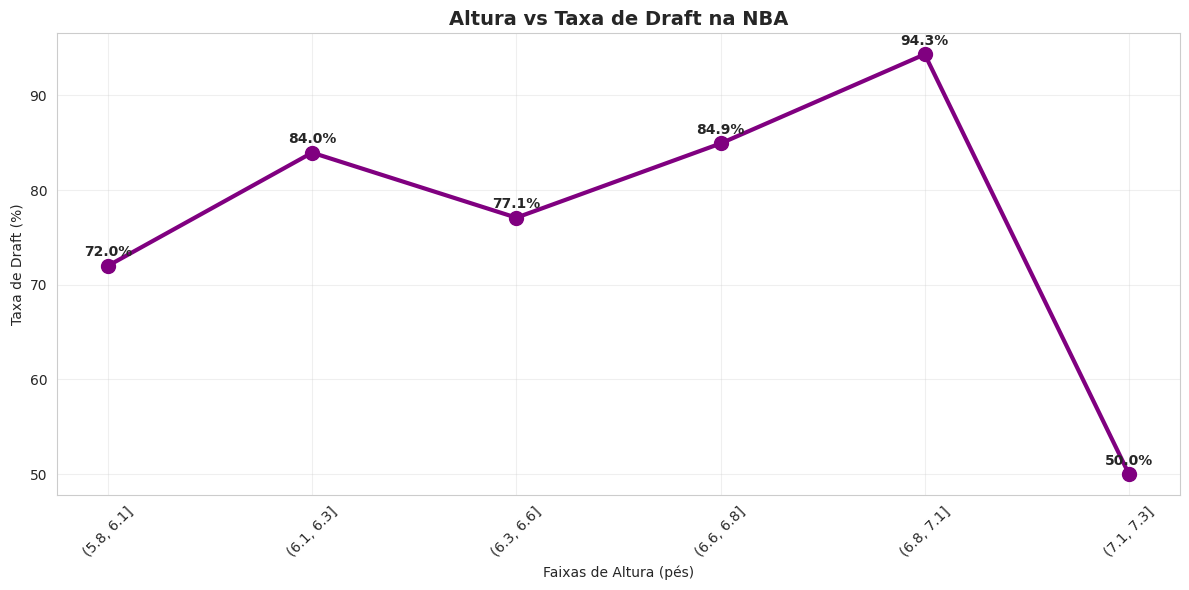

CONCLUSÃO: Altura oferece 44.3% de vantagem no draft


In [40]:
#Gráfico: Taxa de Draft por Altura

""" A função pd.cut é usada para segmentar e agrupar valores contínuos em 'faixas' (bins).
Aqui, estamos dividindo a coluna 'altura_pes' em 6 grupos de tamanho igual
para analisar como a taxa de draft varia entre diferentes faixas de altura."""

dados['faixa_altura'] = pd.cut(dados['altura_pes'], bins=6, precision=1)

# 1. Agrupar por faixa de altura
agrupado = dados.groupby('faixa_altura', observed=False)['foi_draftado']

# 2. Calcular a contagem e a média separadamente
contagem = agrupado.count()
taxa_media = agrupado.mean()

# 3. Juntar os resultados em um novo DataFrame
draft_por_altura = pd.DataFrame({
    'total': contagem,
    'taxa_draft': taxa_media
}).reset_index()


plt.figure(figsize=(12, 6))
faixas = [str(f) for f in draft_por_altura['faixa_altura']]
taxas = draft_por_altura['taxa_draft'] * 100

plt.plot(range(len(faixas)), taxas, marker='o', linewidth=3, markersize=10, color='purple')
plt.xlabel('Faixas de Altura (pés)')
plt.ylabel('Taxa de Draft (%)')
plt.title('Altura vs Taxa de Draft na NBA', fontsize=14, fontweight='bold')
plt.xticks(range(len(faixas)), faixas, rotation=45)
plt.grid(True, alpha=0.3)

# Valores nos pontos
for i, valor in enumerate(taxas):
    plt.text(i, valor + 1, f'{valor:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"CONCLUSÃO: Altura oferece {taxas.max() - taxas.min():.1f}% de vantagem no draft")

## 6. Altura vs Salário: O Valor Real

**Segunda pergunta:** *Ser alto significa ganhar mais?*

In [41]:
# Correlação altura-salário
correlacao_salario = dados['altura_pes'].corr(dados['salary_num'])

print("ALTURA vs SALÁRIO:")
print("=" * 25)
print(f"• Correlação: {correlacao_salario:.3f}")
print(f"• R²: {correlacao_salario**2:.1%} (variância explicada)")

# A função abs() em Python retorna o valor absoluto (magnitude) de um número, ignorando seu sinal.

if abs(correlacao_salario) < 0.1:
    interpretacao = "MUITO FRACA"
elif abs(correlacao_salario) < 0.3:
    interpretacao = "FRACA"
else:
    interpretacao = "MODERADA"

print(f"• Força: {interpretacao}")

ALTURA vs SALÁRIO:
• Correlação: -0.021
• R²: 0.0% (variância explicada)
• Força: MUITO FRACA


---
**Nota Estatística: Correlação (r) e R-Quadrado (R²)**

Nesta seção, calculamos dois números importantes: a **Correlação (r)** e o **R-Quadrado (R²)**. Eles nos dão uma visão mais profunda da relação entre altura e salário.

-   **Correlação (r):** É o mesmo "coeficiente de correlação de Pearson" que vimos no heatmap. Ele mede a força e a direção da relação *linear* entre duas variáveis (de -1 a +1). Um valor como `0.17` confirma a correlação positiva, mas muito fraca.

-   **R-Quadrado (R²):** É simplesmente o valor da correlação ao quadrado (`r * r`).
    -   Ele nos diz **qual porcentagem da variação** em uma variável (Salário) pode ser "explicada" pela variação da outra (Altura).
    -   **Exemplo Prático:** Se o R² entre altura e salário for **2.9%**, isso significa que **apenas 2.9%** das diferenças de salário entre os jogadores podem ser atribuídas à sua altura. Os outros 97.1% são explicados por inúmeros outros fatores (desempenho, posição, tempo de carreira, marketing, etc.).

Um R² baixo, como o que encontramos, é uma prova estatística forte de que a altura, por si só, não é um bom previsor para o salário de um jogador.

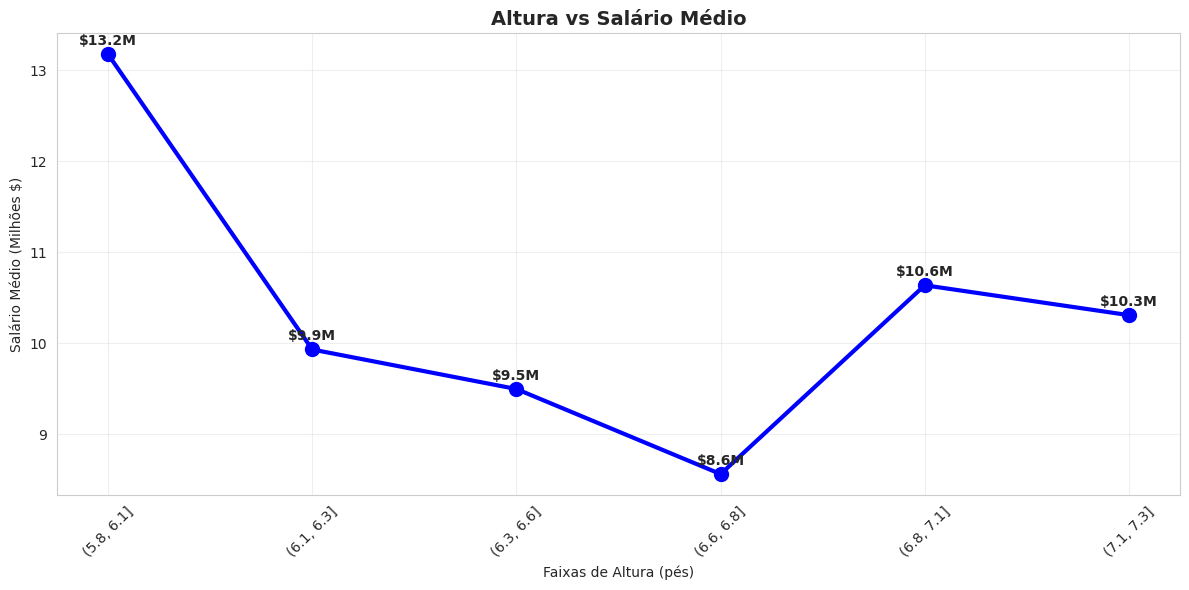

Variação salarial entre faixas: $4.6M


In [42]:
# Gráfico: Salário médio por faixa de altura

salario_por_altura = dados.groupby('faixa_altura', observed=False)['salary_num'].mean().reset_index()

plt.figure(figsize=(12, 6))
faixas_sal = [str(f) for f in salario_por_altura['faixa_altura']]
salarios_medios = salario_por_altura['salary_num'] / 1000000  # Milhões

plt.plot(range(len(faixas_sal)), salarios_medios, marker='o', linewidth=3, markersize=10, color='blue')
plt.xlabel('Faixas de Altura (pés)')
plt.ylabel('Salário Médio (Milhões $)')
plt.title('Altura vs Salário Médio', fontsize=14, fontweight='bold')
plt.xticks(range(len(faixas_sal)), faixas_sal, rotation=45)
plt.grid(True, alpha=0.3)

# Valores nos pontos
for i, valor in enumerate(salarios_medios):
    plt.text(i, valor + 0.1, f'${valor:.1f}M', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

variacao_salario = salarios_medios.max() - salarios_medios.min()
print(f"Variação salarial entre faixas: ${variacao_salario:.1f}M")

#### Confirmamos o que vimos no heatmap, o salário do jogador independe de sua altura. Outras variáveis, como pontuação e quantidade de rebotes, influênciam mais na remuneração. Logo...não. Altura não influência no sucesso finaceiro do jogador. Mas será que a eficiência em campo pode ser afetada pela altura?

## 7. Eficiência vs Volume

**Descoberta surpreendente:** Jogadores altos são mais eficientes nos arremessos, mas jogadores baixos pontuam mais por jogo!

In [43]:
# Preparar dados para análise de Eficiência vs Volume: agrupar dados por faixa de altura e calcular médias
eficiencia_volume = dados.groupby('faixa_altura', observed=False)[['fieldGoalPct', 'avgPoints']].mean().reset_index()
eficiencia_volume.columns = ['faixa_altura', 'fieldGoalPct', 'avgPoints']

print("Dados para Análise de Eficiência vs Volume:")
display(eficiencia_volume)

Dados para Análise de Eficiência vs Volume:


,faixa_altura,fieldGoalPct,avgPoints
0,"(5.8, 6.1]",43.118680,11.735760
1,"(6.1, 6.3]",43.949518,11.513743
2,"(6.3, 6.6]",43.691972,10.168908
3,"(6.6, 6.8]",49.586691,9.081872
4,"(6.8, 7.1]",55.164207,10.416560
5,"(7.1, 7.3]",57.719501,10.063617


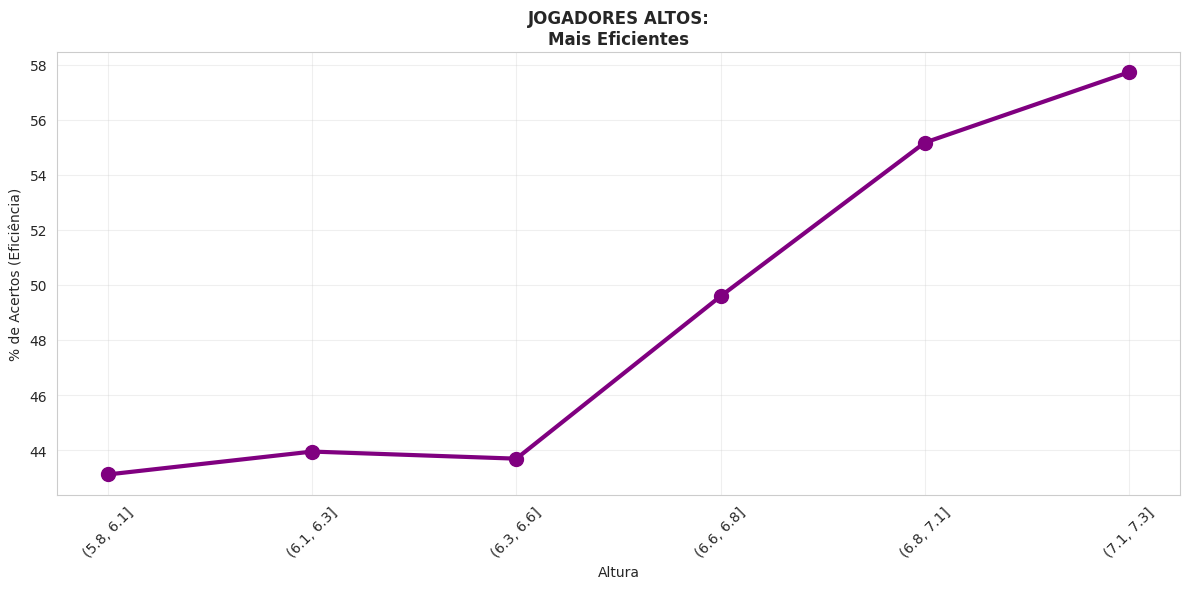

In [44]:
# Gráfico 1: Eficiência
plt.figure(figsize=(12, 6))
faixas = [str(f) for f in eficiencia_volume['faixa_altura']]
eficiencia = eficiencia_volume['fieldGoalPct']

plt.plot(range(len(faixas)), eficiencia, marker='o', linewidth=3, markersize=10, color='purple')
plt.xlabel('Altura')
plt.ylabel('% de Acertos (Eficiência)')
plt.title('JOGADORES ALTOS:\nMais Eficientes', fontweight='bold')
plt.xticks(range(len(faixas)), faixas, rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

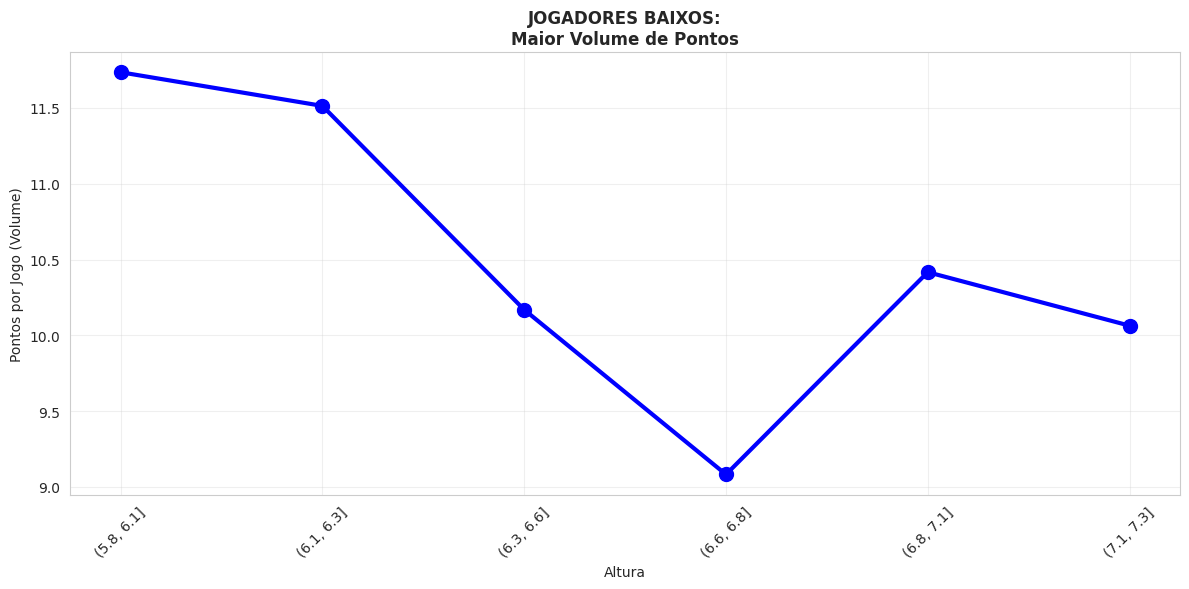

In [45]:
# Gráfico 2: Volume
plt.figure(figsize=(12, 6))
faixas = [str(f) for f in eficiencia_volume['faixa_altura']]
volume = eficiencia_volume['avgPoints']

plt.plot(range(len(faixas)), volume, marker='o', linewidth=3, markersize=10, color='blue')
plt.xlabel('Altura')
plt.ylabel('Pontos por Jogo (Volume)')
plt.title('JOGADORES BAIXOS:\nMaior Volume de Pontos', fontweight='bold')
plt.xticks(range(len(faixas)), faixas, rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [46]:
print("=" * 38)
print(f"Eficiência: +{eficiencia.max() - eficiencia.min():.1f}% (altos > baixos)")
print(f"Volume: -{volume.max() - volume.min():.1f} pts/jogo (baixos > altos)")
print(f"\nCADA ALTURA TEM SUA ESPECIALIDADE!")

Eficiência: +14.6% (altos > baixos)
Volume: -2.7 pts/jogo (baixos > altos)

CADA ALTURA TEM SUA ESPECIALIDADE!


Descobrimos que jogadores altos e baixos desempenham papéis bem diferentes na NBA, que os jogadores mais altos são responssaveis por um maior percentual de acertos, em conformidade com nosso heatmap, mas que surpreendetemente os jogadores mais baixos fazem um valor maior de pontos. Como isso é possível?

Pensamos na seguinte hipotese: jogadores mais baixos deve estar em posições como Point Guards e Shooting Guards, que muitas vezes têm a função primária de criar e finalizar jogadas de ataque, lidando mais com a bola e buscando oportunidades de pontuar. Jogadores mais altos teriam como função os Centers e Power Forwards, que focam mais em rebotes, bloqueios e arremessos próximos à cesta.

Vamos verificar se é isso mesmo.

## 8. Altura por Posição: Contexto Tático

**Última análise:** Como a altura se distribui por posições?

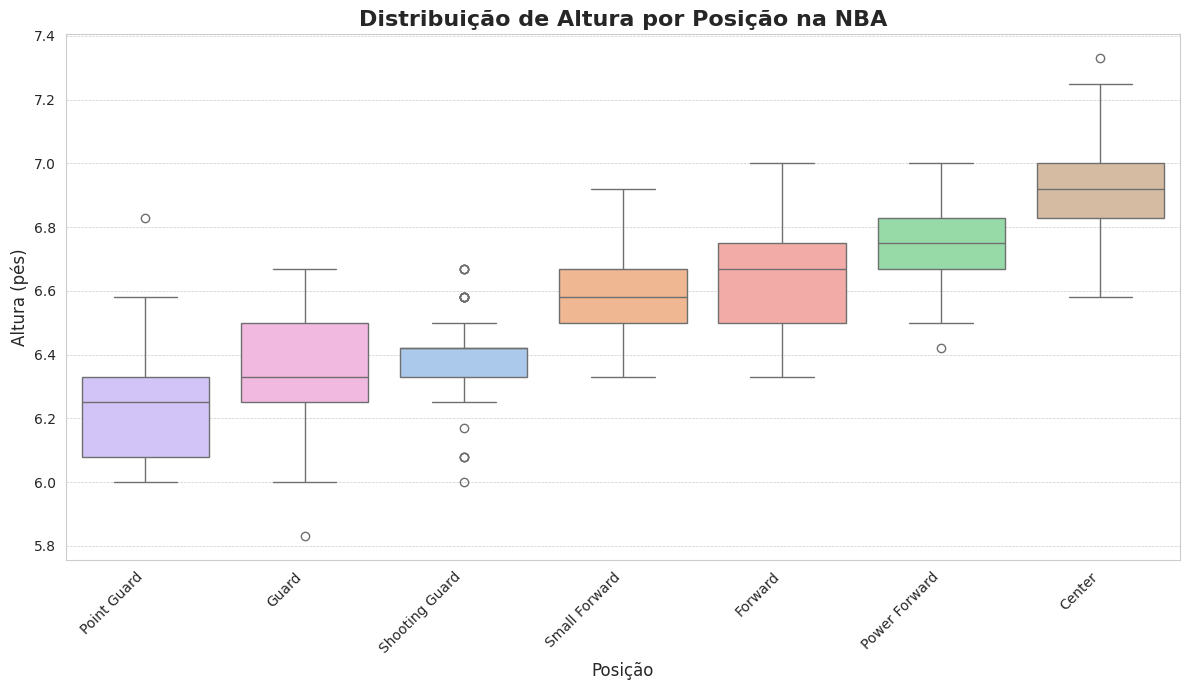

In [47]:
# Boxplot por posição
dados_posicao = dados.dropna(subset=['altura_pes', 'position'])

plt.figure(figsize=(12, 7))

# Para um gráfico mais claro, vamos ordenar as posições pela altura média
ordem_posicoes = dados_posicao.groupby('position')['altura_pes'].mean().sort_values().index

# Usar Seaborn para criar o boxplot
sns.boxplot(data=dados_posicao, x='position', y='altura_pes', order=ordem_posicoes, palette='pastel', hue='position', legend=False)

plt.xlabel('Posição', fontsize=12)
plt.ylabel('Altura (pés)', fontsize=12)
plt.title('Distribuição de Altura por Posição na NBA', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [48]:
# Resumo estatístico por posição

# 1. Agrupar os dados por posição
grupo_posicao = dados_posicao.groupby('position')['altura_pes']

# 2. Calcular cada estatística separadamente
contagem = grupo_posicao.count()
media = grupo_posicao.mean()
desvio_padrao = grupo_posicao.std()

# 3. Juntar tudo em um novo DataFrame
resumo_posicoes = pd.DataFrame({
    'Jogadores': contagem,
    'Altura_Média': media,
    'Variação': desvio_padrao
}).round(2)

resumo_posicoes = resumo_posicoes.sort_values('Altura_Média')

print("RESUMO POR POSIÇÃO:")
print("=" * 50)
print(resumo_posicoes)

RESUMO POR POSIÇÃO:
                Jogadores  Altura_Média  Variação
position                                         
Point Guard            65          6.25      0.18
Guard                  34          6.36      0.19
Shooting Guard         84          6.40      0.13
Small Forward          66          6.59      0.12
Forward                46          6.64      0.15
Power Forward          70          6.73      0.13
Center                 68          6.92      0.14


In [49]:
# Insights principais
pos_mais_alta = resumo_posicoes.index[-1]
pos_mais_baixa = resumo_posicoes.index[0]
diferenca_posicoes = resumo_posicoes['Altura_Média'].max() - resumo_posicoes['Altura_Média'].min()

print(f"PRINCIPAIS INSIGHTS:")
print(f"• Posição mais alta: {pos_mais_alta} ({resumo_posicoes.loc[pos_mais_alta, 'Altura_Média']:.2f} pés)")
print(f"• Posição mais baixa: {pos_mais_baixa} ({resumo_posicoes.loc[pos_mais_baixa, 'Altura_Média']:.2f} pés)")
print(f"• Diferença entre posições: {diferenca_posicoes:.2f} pés")
print(f"• Altura define ESPECIALIZAÇÃO tática na NBA")

PRINCIPAIS INSIGHTS:
• Posição mais alta: Center (6.92 pés)
• Posição mais baixa: Point Guard (6.25 pés)
• Diferença entre posições: 0.67 pés
• Altura define ESPECIALIZAÇÃO tática na NBA


Jogadores mais baixos geralmente são mais rápidos e ágeis, o que permite:

- Penetrar na defesa com mais facilidade, chegando mais perto da cesta para arremessos de maior probabilidade ou sofrendo faltas para ir para a linha de lance livre (que não contam no percentual de arremessos de quadra, mas contam como pontos).
- Criar mais oportunidades de arremesso para si mesmos ou para outros, através de dribles e movimentação
- Focar no controle de bola superior como diferencial, o que é essencial para criar jogadas e arremessos em situações de pressão.
- Armadores e alas, muitas vezes se especializam em arremessos de média e longa distância (incluindo bolas de 3 pontos). Embora a porcentagem de acerto nesses arremessos seja menor do que os arremessos próximos à cesta (onde jogadores altos dominam), cada arremesso convertido vale mais pontos (2 ou 3, em vez de 2 para a maioria dos arremessos de jogadores altos). Um volume alto de arremessos de 3 pontos, mesmo com uma porcentagem menor, pode resultar em muitos pontos.

#### Significa que podemos entender que jogadores altos são eficientes em arremessos de alta probabilidade perto da cesta, enquanto jogadores baixos utilizam sua velocidade, drible e capacidade de arremessar de longe para gerar um volume maior de pontos, mesmo que precisem de mais tentativas para acertar.

## Conclusão: A Altura Importa para os Jogadores da NBA?

### **RESPOSTA: SIM, mas de forma COMPLEXA!**

**O que descobrimos:**

1. **OPORTUNIDADE (Draft):**
   - Altura facilita a entrada na NBA
   - Diferença significativa entre draftados e não-draftados

2. **VALOR FINANCEIRO (Salário):**
   - Correlação FRACA entre altura e salário
   - Altura não garante sucesso financeiro

3. **ESPECIALIZAÇÃO (Performance):**
   - **Jogadores ALTOS**: Mais eficientes, especialistas em rebotes
   - **Jogadores BAIXOS**: Maior volume de pontos, mais versáteis

4. **CONTEXTO TÁTICO:**
   - Cada posição tem seu padrão de altura
   - Altura determina especialização, não valor absoluto

### **INSIGHT PRINCIPAL:**
**A altura importa para ESPECIALIZAÇÃO e OPORTUNIDADE, mas não determina SUCESSO FINAL na NBA. Cada jogador deve maximizar suas características físicas únicas e trabalhar em equipe para equilibrar pontos fortes e fracos caracteristicos de suas posições no time.**